In [ ]:
#The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. 
#It contains one set of SMS messages in English of 5,572 messages, tagged acording being ham (legitimate) or spam.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df=pd.read_table("smsspamcollection.tsv",delimiter="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [87]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [88]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [89]:
df.duplicated().sum()

403

In [90]:
df=df.drop_duplicates(keep='first')

In [91]:
df.shape

(5169, 4)

In [92]:
df["label"].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

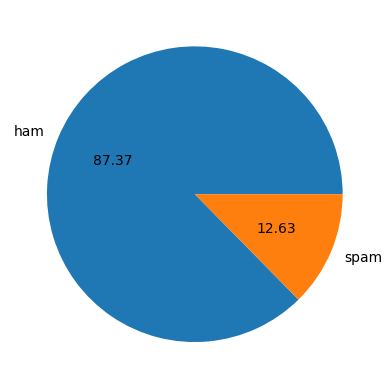

In [93]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [94]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("stopwords")
stpw=stopwords.words("english")
from nltk.stem import PorterStemmer,WordNetLemmatizer
stem = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [95]:
def clean_sent(message):
  a=word_tokenize(message.lower())
  b=[i for i in a if i.isalpha()]
  c=[i for i in b if i not in stpw]
  d=[stem.stem(i) for i in c]
  e=[lemmatizer.lemmatize(i) for i in d]
  return " ".join(c)


In [96]:
df['msg']=df['message'].apply(clean_sent)

In [97]:
df.head()

,label,message,length,punct,msg
0,ham,"Go until jurong point, crazy.. Available only ...",111,9,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,49,6,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,nah think goes usf lives around though


In [98]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [99]:
spam_wc=wc.generate(df[df['label']=='spam']['msg'].str.cat(sep=" "))

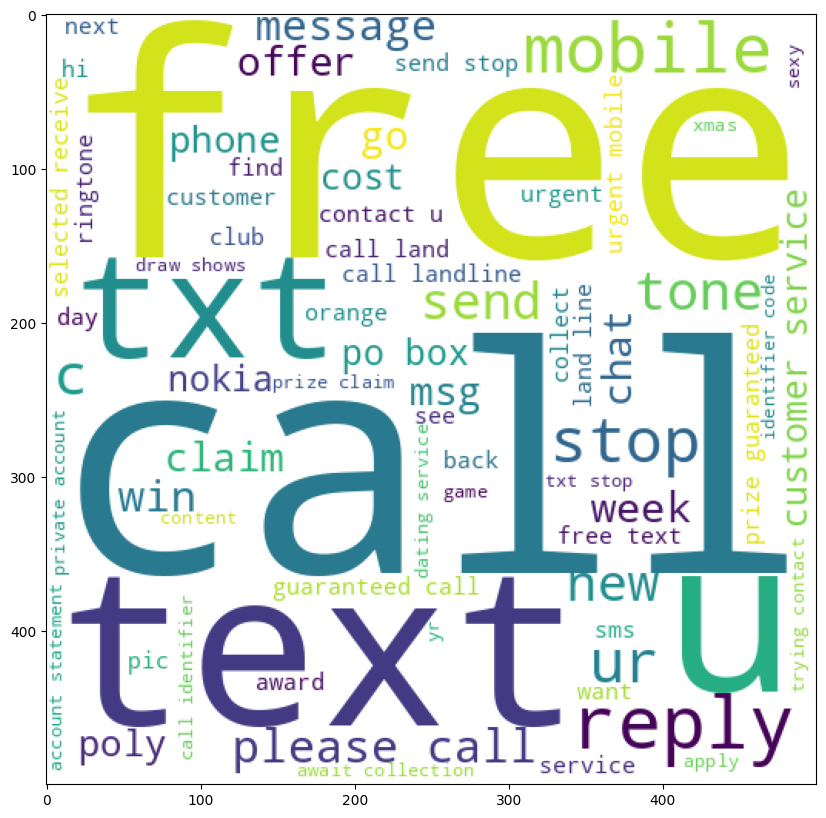

In [100]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)

In [101]:
ham_wc=wc.generate(df[df['label']=='ham']['msg'].str.cat(sep=" "))

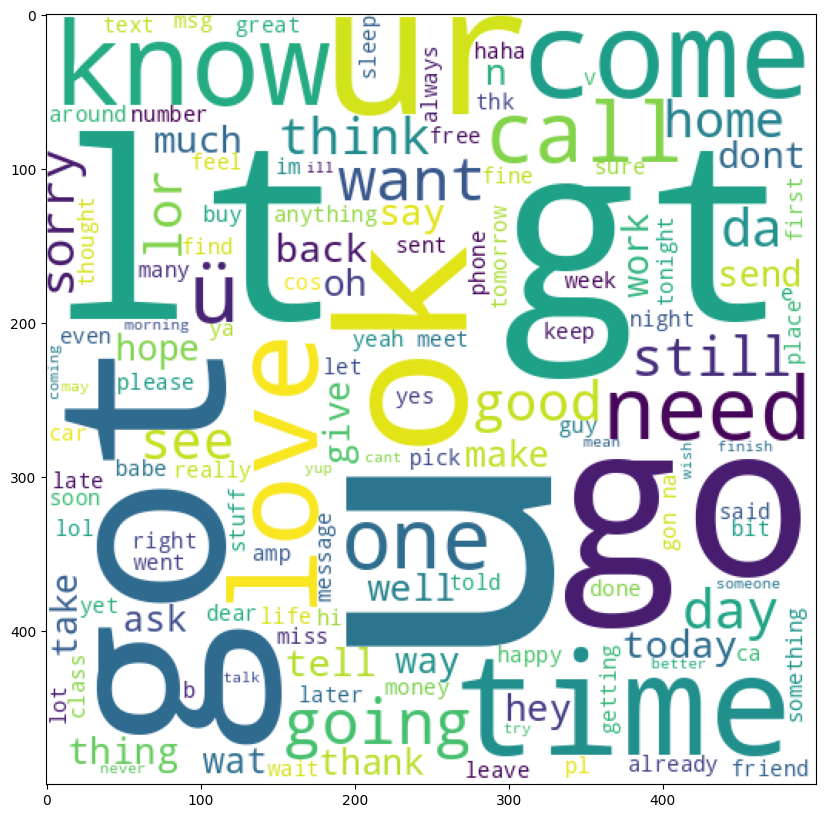

In [102]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [103]:
x=df['msg']
y=df['label']

In [104]:
#count vectorizer

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [106]:
x=cv.fit_transform(x).toarray()

In [107]:
x.shape

(5169, 7197)

In [108]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [124]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)

In [125]:
from sklearn.metrics import classification_report

In [139]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1369
        spam       0.84      0.87      0.85       182

    accuracy                           0.97      1551
   macro avg       0.91      0.92      0.92      1551
weighted avg       0.97      0.97      0.97      1551



In [129]:
msg='free free buy 1 Get 1 free'

In [130]:
fmsg=clean_sent(msg)

In [131]:
fmsg=cv.transform([fmsg]).toarray()

In [132]:
fmsg.shape

(1, 7197)

In [133]:
mnb.predict(fmsg)

array(['spam'], dtype='<U4')

In [134]:
def make_pred(msg):
  fmsg=clean_sent(msg)
  fmsg=cv.transform([fmsg]).toarray()
  return mnb.predict(fmsg)[0]

In [135]:
msg2= "this is demo lecture on count vectorizer"

In [136]:
make_pred(msg2)

'ham'

In [137]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(n_estimators=50,random_state=2)
bc.fit(x_train,y_train)
y_pred2=bc.predict(x_test)

In [140]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1369
        spam       0.92      0.79      0.85       182

    accuracy                           0.97      1551
   macro avg       0.95      0.89      0.92      1551
weighted avg       0.97      0.97      0.97      1551

